##### The task is to train a network to discriminate between sonar signals bounced off a metal cylinder and those bounced off a roughly cylindrical rock.



In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import  accuracy_score
import math


Reading and analyzing data

In [2]:
df = pd.read_csv(r'C:/Users/Narevayin/Documents/ML/DATA/sonar.all-data.csv')

In [3]:
df

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


C:\Users\Narevayin\AppData\Local\Temp\ipykernel_6864\88528190.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(), xticklabels = correlation.columns, yticklabels = correlation.columns)


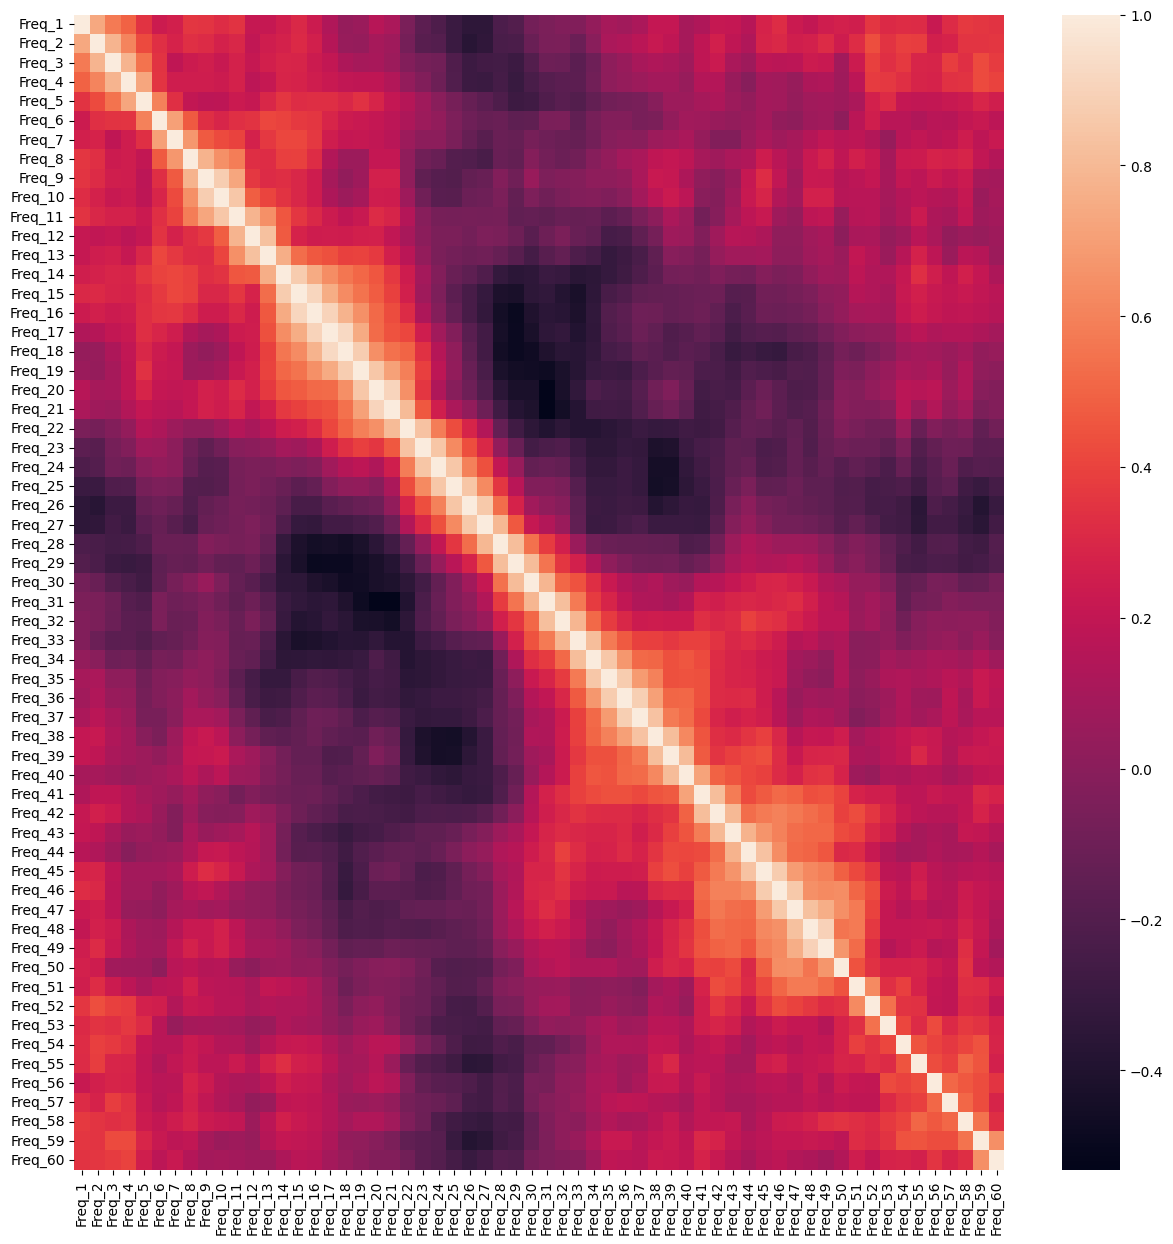

In [44]:
#correlation heatmap

fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(df.corr(), xticklabels = correlation.columns, yticklabels = correlation.columns)

In [45]:
df['Label'].replace(['R','M'],[1,0], inplace=True)

In [47]:
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1


In [49]:
c = df.corr().abs()
c

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
Freq_1,1.000000,0.735896,0.571537,0.491438,0.344797,0.238921,0.260815,0.355523,0.353420,0.318276,...,0.355299,0.311729,0.322299,0.312067,0.220642,0.313725,0.368132,0.357116,0.347078,0.271694
Freq_2,0.735896,1.000000,0.779916,0.606684,0.419669,0.332329,0.279040,0.334615,0.316733,0.270782,...,0.434548,0.346076,0.383960,0.380165,0.262263,0.280341,0.353042,0.352200,0.358761,0.231238
Freq_3,0.571537,0.779916,1.000000,0.781786,0.546141,0.346275,0.190434,0.237884,0.252691,0.219637,...,0.394076,0.332914,0.367186,0.289731,0.287661,0.380819,0.334108,0.425047,0.373948,0.192195
Freq_4,0.491438,0.606684,0.781786,1.000000,0.726943,0.352805,0.246440,0.246742,0.247078,0.237769,...,0.374651,0.364772,0.334211,0.284955,0.280938,0.340254,0.344865,0.420266,0.400626,0.250638
Freq_5,0.344797,0.419669,0.546141,0.726943,1.000000,0.597053,0.335422,0.204006,0.177906,0.183219,...,0.266617,0.314985,0.205306,0.196472,0.199323,0.219395,0.238793,0.290982,0.253710,0.222232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Freq_57,0.313725,0.280341,0.380819,0.340254,0.219395,0.161333,0.186324,0.267212,0.193963,0.140327,...,0.191264,0.308197,0.361443,0.387204,0.515154,1.000000,0.509805,0.431295,0.287219,0.000933
Freq_58,0.368132,0.353042,0.334108,0.344865,0.238793,0.203986,0.242646,0.287603,0.231745,0.212277,...,0.309673,0.370764,0.404117,0.503465,0.463659,0.509805,1.000000,0.550235,0.329827,0.184191
Freq_59,0.357116,0.352200,0.425047,0.420266,0.290982,0.220573,0.183578,0.194400,0.097293,0.058273,...,0.298711,0.346095,0.447118,0.453658,0.430804,0.431295,0.550235,1.000000,0.642872,0.130826
Freq_60,0.347078,0.358761,0.373948,0.400626,0.253710,0.178158,0.222493,0.146216,0.095243,0.097358,...,0.195379,0.280780,0.283471,0.264399,0.349449,0.287219,0.329827,0.642872,1.000000,0.090055


In [50]:
s = c.unstack()

In [51]:
s

Freq_1  Freq_1     1.000000
        Freq_2     0.735896
        Freq_3     0.571537
        Freq_4     0.491438
        Freq_5     0.344797
                     ...   
Label   Freq_57    0.000933
        Freq_58    0.184191
        Freq_59    0.130826
        Freq_60    0.090055
        Label      1.000000
Length: 3721, dtype: float64

In [52]:
so = s.sort_values(ascending=False)

In [57]:
so['Label'].head(6)


Label      1.000000
Freq_11    0.432855
Freq_12    0.392245
Freq_49    0.351312
Freq_10    0.341142
Freq_45    0.339406
dtype: float64

#### spliting data into train and test, 90/10 as the task requires

In [59]:
x = df.drop('Label', axis = 1)
y = df['Label']

In [60]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.1, random_state=42)

In [82]:
scaler = StandardScaler()

In [83]:
knn = KNeighborsClassifier()

In [84]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [85]:
operations = [('scaler', scaler),('knn', knn)]

In [86]:
from sklearn.pipeline import Pipeline

In [87]:
pipe = Pipeline(operations)

In [88]:
from sklearn.model_selection import GridSearchCV

In [128]:
k_values = list(range(1,30))
k_values

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [129]:
param_grid = {'knn__n_neighbors': k_values}

In [130]:
cv_classif = GridSearchCV(pipe,param_grid, cv = 5, scoring='accuracy')

In [131]:
cv_classif.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [132]:
cv_classif.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [133]:
mts = cv_classif.cv_results_['mean_test_score']
mts

array([0.84537696, 0.78065434, 0.77524893, 0.75917496, 0.75931721,
       0.74822191, 0.75945946, 0.71664296, 0.7113798 , 0.68421053,
       0.70042674, 0.68435277, 0.68449502, 0.67908962, 0.69530583,
       0.68990043, 0.7113798 , 0.70042674, 0.72204836, 0.67908962,
       0.70071124, 0.69530583, 0.69530583, 0.68463727, 0.68477952,
       0.67923186, 0.67411095, 0.65775249, 0.6685633 ])

C:\Users\Narevayin\AppData\Local\Temp\ipykernel_6864\911021173.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(mts, '-ok', color = 'blue')


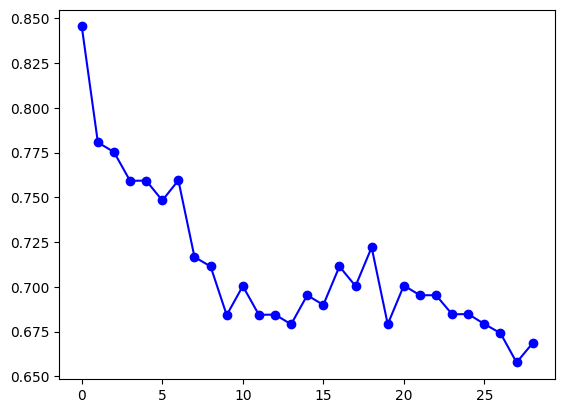

In [134]:
plt.plot(mts, '-ok', color = 'blue')

In [135]:
#define model
classifier = KNeighborsClassifier(n_neighbors=1, p=2, metric='euclidean')

In [136]:
classifier.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [137]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0],
      dtype=int64)

In [138]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[12  1]
 [ 1  7]]


In [140]:
from sklearn.metrics import classification_report


In [147]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.88      0.88      0.88         8

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21

